# Colab Set-Up

All the imports are mentioned here, if there are any other imports populate the list here, so as to import all the necessary packages at once

In [36]:
# @title Imports
from smart_open import open
import zipfile
import io
import os
import glob
import shutil
import tempfile
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from PIL import Image
from torch.utils.data import Dataset
from collections import defaultdict
from torchvision import transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from google.colab import drive

In [2]:
# @title Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get the Dataset

In [37]:
# @title Check for the source zip file

# Define the path to the zip file
zip_file_path = '/content/drive/MyDrive/myfile.zip'

# Check if the file exists
if os.path.exists(zip_file_path):
    print(f"File '{zip_file_path}' exists.")
else:
    print(f"File '{zip_file_path}' does not exist.")


File '/content/drive/MyDrive/myfile.zip' exists.


In [ ]:
# @title Copy the extracted dataset common folder from drive if you have it in drive
# Source and destination folder paths
# source_folder = '/content/all_images'
# destination_folder = '/content/drive/MyDrive/5K_dataset'

# # Check if the source folder exists
# if os.path.exists(source_folder):
#     # Iterate over files in the source folder
#     for file_name in os.listdir(source_folder):
#         # Construct full file paths
#         source_file = os.path.join(source_folder, file_name)
#         destination_file = os.path.join(destination_folder, file_name)

#         # Check if the current path is a file
#         if os.path.isfile(source_file):
#             # Copy the file to the destination folder
#             shutil.copy(source_file, destination_file)
#             print(f"File '{file_name}' copied from {source_folder} to {destination_folder}")
# else:
#     print(f"Source folder '{source_folder}' does not exist.")


### Create folders from zip file

- We stream files directly from the zip file of dataset inorder to avoid OSError: [Errno 5] Input/output error
- There are 4 folders in the zipfile namely:
  - LG
  - LGIS
  - IS
  - ISLG
- So, stream these folders after creating a folders in colab disk for all the 4 classes in the dataset.
- Loading only 1st 5000 files of each folder.
- extract the first 500 files.

In [12]:
# @title extract files from LG
# Destination directory on Colab disk
destination_path = '/content/LG'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# List files in the specified folder within the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    # Filter files to only include those in 'StairNet/IS/'
    target_files = [f for f in all_files if f.startswith('StairNet/LG/')]

    # Limit to the first 44236 files
    target_files = target_files[:44236]

    # Extract the files
    for file in target_files:
        zip_ref.extract(file, destination_path)

In [ ]:
# @title extract files from LGIS
# Destination directory on Colab disk
destination_path = '/content/LGIS'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# List files in the specified folder within the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    # Filter files to only include those in 'StairNet/IS/'
    target_files = [f for f in all_files if f.startswith('StairNet/LGIS/')]

    # Limit to the first 1588 files
    target_files = target_files[:1588]

    # Extract the files
    for file in target_files:
        zip_ref.extract(file, destination_path)

In [ ]:
# @title extract files from IS
# Destination directory on Colab disk
destination_path = '/content/IS'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# List files in the specified folder within the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    # Filter files to only include those in 'StairNet/IS/'
    target_files = [f for f in all_files if f.startswith('StairNet/IS/')]

    # Limit to the first 4817 files
    target_files = target_files[:4817]

    # Extract the files
    for file in target_files:
        zip_ref.extract(file, destination_path)

In [ ]:
# @title extract files from ISLG
# Destination directory on Colab disk
destination_path = '/content/ISLG'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# List files in the specified folder within the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    # Filter files to only include those in 'StairNet/IS/'
    target_files = [f for f in all_files if f.startswith('StairNet/ISLG/')]

    # Limit to the first 902 files
    target_files = target_files[:902]

    # Extract the files
    for file in target_files:
        zip_ref.extract(file, destination_path)

- Counts number of files in folders

In [13]:
# Specify the path to the folder
folder_path = '/content/LGIS'

# Initialize a counter for files
file_count = 0

# Iterate over files in the folder
for _, _, files in os.walk(folder_path):
    file_count += len(files)

print(f"Number of files in '{folder_path}': {file_count}")


Number of files in '/content/LGIS': 4999


### Create a common folder to store all the images in a together

In [16]:
# @title Final reduced dataset common folder
os.makedirs('all_images', exist_ok=True)

In [ ]:
# @title Copy images from LGIS to all_images

# Source and destination folder paths
source_folder = '/content/LGIS'
destination_folder = '/content/all_images'

# Check if the source folder exists
if os.path.exists(source_folder):
    # Iterate over files in the source folder
    for file_name in os.listdir(source_folder):
        # Construct full file paths
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)

        # Check if the current path is a file
        if os.path.isfile(source_file):
            # Copy the file to the destination folder
            shutil.copy(source_file, destination_file)
            print(f"File '{file_name}' copied from {source_folder} to {destination_folder}")
else:
    print(f"Source folder '{source_folder}' does not exist.")


In [ ]:
# @title Copy images from LG to all_images

# Source and destination folder paths
source_folder = '/content/LG'
destination_folder = '/content/all_images'

# Check if the source folder exists
if os.path.exists(source_folder):
    # Iterate over files in the source folder
    for file_name in os.listdir(source_folder):
        # Construct full file paths
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)

        # Check if the current path is a file
        if os.path.isfile(source_file):
            # Copy the file to the destination folder
            shutil.copy(source_file, destination_file)
            print(f"File '{file_name}' copied from {source_folder} to {destination_folder}")
else:
    print(f"Source folder '{source_folder}' does not exist.")


In [ ]:
# @title Copy images from IS to all_images

# Source and destination folder paths
source_folder = '/content/IS'
destination_folder = '/content/all_images'

# Check if the source folder exists
if os.path.exists(source_folder):
    # Iterate over files in the source folder
    for file_name in os.listdir(source_folder):
        # Construct full file paths
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)

        # Check if the current path is a file
        if os.path.isfile(source_file):
            # Copy the file to the destination folder
            shutil.copy(source_file, destination_file)
            print(f"File '{file_name}' copied from {source_folder} to {destination_folder}")
else:
    print(f"Source folder '{source_folder}' does not exist.")


In [ ]:
# @title Copy images from ISLG to all_images

# Source and destination folder paths
source_folder = '/content/ISLG'
destination_folder = '/content/all_images'

# Check if the source folder exists
if os.path.exists(source_folder):
    # Iterate over files in the source folder
    for file_name in os.listdir(source_folder):
        # Construct full file paths
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)

        # Check if the current path is a file
        if os.path.isfile(source_file):
            # Copy the file to the destination folder
            shutil.copy(source_file, destination_file)
            print(f"File '{file_name}' copied from {source_folder} to {destination_folder}")
else:
    print(f"Source folder '{source_folder}' does not exist.")


In [39]:
# @title Check the count of the images you store in dataset final reduced folder (we bring all the class examples{LG, ISLG, LGIS, LG})
# Define the directory containing the images
image_directory = '/content/all_images'
all_images_and_labels = os.listdir(image_directory)

# Initialize counters for each suffix
lg_count = 0
lg_is_count = 0
is_count = 0
is_lg_count = 0

# List all files in the directory
for filename in all_images_and_labels:
    # Check and count for each suffix
    if filename.endswith(' LG.jpg'):
        lg_count += 1
    elif filename.endswith(' LGIS.jpg'):
        lg_is_count += 1
    elif filename.endswith(' IS.jpg'):
        is_count += 1
    elif filename.endswith(' ISLG.jpg'):
        is_lg_count += 1

# Print the counts
print(f"Number of images ending with 'LG': {lg_count}")
print(f"Number of images ending with 'LG-IS': {lg_is_count}")
print(f"Number of images ending with 'IS': {is_count}")
print(f"Number of images ending with 'IS-LG': {is_lg_count}")


Number of images ending with 'LG': 4999
Number of images ending with 'LG-IS': 4999
Number of images ending with 'IS': 4999
Number of images ending with 'IS-LG': 4999


## Step 2: Data Pre-processing

In [40]:
# @title set device randomness of torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

torch.manual_seed(42)
np.random.seed(42)

Using device: cuda


### First, let's define the dataset structure

dataset_structure = {
    'IS': 48179,
    'ISLG': 9025,
    'LG': 442360,
    'LGIS': 15888
}

As this is a huge number we take some percentage of these data (like 10%, 50%)

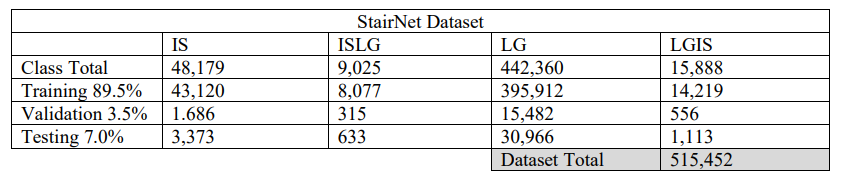

### Test-val-Train split
- Now, let's create function to train-val-test split the data according to the given percentages:

In [41]:
# Test_Val_Train Split
def split_data(file_list, train_pct=0.895, val_pct=0.035, test_pct=0.07):
    random.shuffle(file_list)
    total = len(file_list)
    train_end = int(total * train_pct)
    val_end = train_end + int(total * val_pct)

    return file_list[:train_end], file_list[train_end:val_end], file_list[val_end:]

### Define dataset class and setup the dataloaders
- To load the data, we'll need to create a custom dataset class
- As we have filenames as lables to the examples, we handle that too in the dataset class

In [42]:
class StairNetDataset(Dataset):
    def __init__(self, root_dir, file_list, transform=None):
        self.root_dir = root_dir
        self.file_list = file_list
        self.transform = transform
        self.class_to_idx = {'IS': 0, 'ISLG': 1, 'LG': 2, 'LGIS': 3}

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        # Extract label from filename
        parts = img_name.split()
        label = parts[-1].split('.')[0]  # Get the last part before the file extension

        # Handle the case where the label might be two words (e.g., 'LG IS')
        if len(parts) > 2 and parts[-2] in ['LG', 'IS']:
            label = f"{parts[-2]} {label}"

        label_idx = self.class_to_idx[label]

        if self.transform:
            image = self.transform(image)

        return image, label_idx

- create a stratified dataset as the number of examples for all the classes are not same
- setup the dataloaders
- also define the data transforms

In [43]:
def split_data_stratified(file_list, train_pct=0.895, val_pct=0.035, test_pct=0.07):
    # Group files by class
    class_files = defaultdict(list)
    for file in file_list:
        parts = file.split()
        label = parts[-1].split('.')[0]
        if len(parts) > 2 and parts[-2] in ['LG', 'IS']:
            label = f"{parts[-2]} {label}"
        class_files[label].append(file)

    train_files, val_files, test_files = [], [], []

    for class_label, files in class_files.items():
        random.shuffle(files)
        n_files = len(files)
        n_train = int(n_files * train_pct)
        n_val = int(n_files * val_pct)

        train_files.extend(files[:n_train])
        val_files.extend(files[n_train:n_train+n_val])
        test_files.extend(files[n_train+n_val:])

    random.shuffle(train_files)
    random.shuffle(val_files)
    random.shuffle(test_files)

    return train_files, val_files, test_files


# Define transforms
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])



Number of training samples: 17896
Number of validation samples: 696
Number of test samples: 1404


### Feed the dataset

- Define the root directory of dataset
- test train split
- Initialize the dataset by passing them to the dataloaders

In [ ]:
# Set up data
root_dir = '/content/all_images'
all_files = os.listdir(root_dir)
image_files = [f for f in all_files if f.endswith('.jpg')]

# Split data
train_files, val_files, test_files = split_data_stratified(image_files)

# Create datasets
train_dataset = StairNetDataset(root_dir, train_files, transform=train_transform)
val_dataset = StairNetDataset(root_dir, val_files, transform=val_transform)
test_dataset = StairNetDataset(root_dir, test_files, transform=val_transform)

# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

### Model is designed as per the mentions in the paper
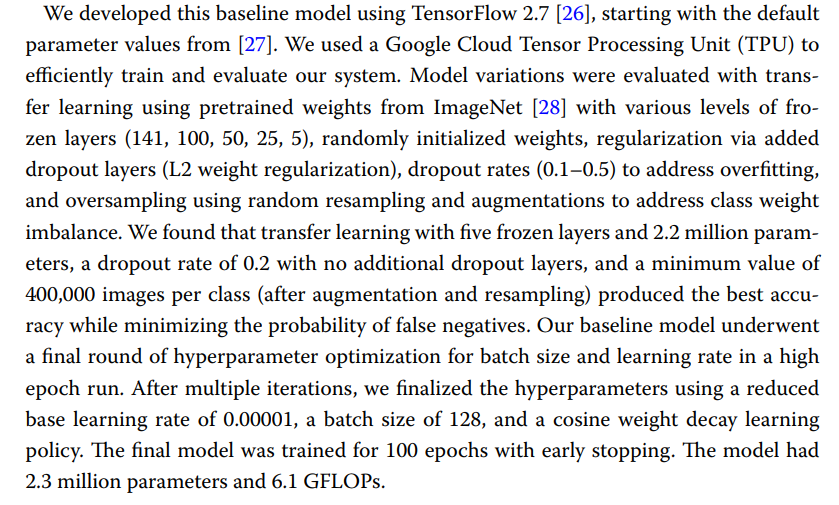

### Define the custom mobilenet_V2 model

- load the pretrained mobilbnet_v2 model
- freeze 5 layers
- modify the classifier

In [44]:
class CustomMobileNetV2(nn.Module):
  def __init__(self, num_classes=4, dropout_rate=0.2):
    super(CustomMobileNetV2, self).__init__()

    # Load pretrained MobileNetV2
    self.model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

    # Freeze first 5 layers
    for i, param in enumerate(self.model.features[:5].parameters()):
        param.requires_grad = False

    # Modify the classifier
    in_features = self.model.classifier[1].in_features
    self.model.classifier = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features, num_classes)
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
# Initialoize the model
model = CustomMobileNetV2(num_classes=4, dropout_rate=0.2)

### Print model summary

- run `!pip install torchsummary` if this gives error of missing module `torchsummary`

In [ ]:
# Print model summary
from torchsummary import summary
summary(model, (3, 224, 224), device='cpu')

# Verify number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {trainable_params}")

### Define criterion for loss and optimizer

- criterion
- optimizer
- scheduler is for cosine weight decay

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # for optimization
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma=0.1)

# Train the model

- runs 10 epochs and stores the best evaluation accuracy model

In [29]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25, device='cuda'):
    model.to(device)
    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_correct / train_total

        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        #optimization
        # Add this line to update the scheduler
#         scheduler.step(val_loss)

        # Save the best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best validation accuracy: {best_val_accuracy:.4f}')

# Use the function
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

Epoch 1/10: 100%|██████████| 140/140 [03:19<00:00,  1.42s/it]


Epoch 1/10:
Train Loss: 0.6141, Train Accuracy: 0.7598
Val Loss: 0.3509, Val Accuracy: 0.8563


Epoch 2/10: 100%|██████████| 140/140 [03:14<00:00,  1.39s/it]


Epoch 2/10:
Train Loss: 0.4740, Train Accuracy: 0.8200
Val Loss: 0.2929, Val Accuracy: 0.8865


Epoch 3/10: 100%|██████████| 140/140 [03:12<00:00,  1.38s/it]


Epoch 3/10:
Train Loss: 0.4188, Train Accuracy: 0.8423
Val Loss: 0.2824, Val Accuracy: 0.9023


Epoch 4/10: 100%|██████████| 140/140 [03:18<00:00,  1.42s/it]


Epoch 4/10:
Train Loss: 0.3938, Train Accuracy: 0.8517
Val Loss: 0.2702, Val Accuracy: 0.9052


Epoch 5/10: 100%|██████████| 140/140 [03:20<00:00,  1.44s/it]


Epoch 5/10:
Train Loss: 0.3706, Train Accuracy: 0.8615
Val Loss: 0.2223, Val Accuracy: 0.9296


Epoch 6/10: 100%|██████████| 140/140 [03:21<00:00,  1.44s/it]


Epoch 6/10:
Train Loss: 0.3423, Train Accuracy: 0.8716
Val Loss: 0.1883, Val Accuracy: 0.9382


Epoch 7/10: 100%|██████████| 140/140 [03:25<00:00,  1.47s/it]


Epoch 7/10:
Train Loss: 0.3212, Train Accuracy: 0.8794
Val Loss: 0.1782, Val Accuracy: 0.9397


Epoch 8/10: 100%|██████████| 140/140 [03:18<00:00,  1.42s/it]


Epoch 8/10:
Train Loss: 0.3178, Train Accuracy: 0.8800
Val Loss: 0.1862, Val Accuracy: 0.9353


Epoch 9/10: 100%|██████████| 140/140 [03:28<00:00,  1.49s/it]


Epoch 9/10:
Train Loss: 0.3025, Train Accuracy: 0.8880
Val Loss: 0.1638, Val Accuracy: 0.9353


Epoch 10/10: 100%|██████████| 140/140 [03:22<00:00,  1.45s/it]


Epoch 10/10:
Train Loss: 0.2958, Train Accuracy: 0.8903
Val Loss: 0.1841, Val Accuracy: 0.9425
Best validation accuracy: 0.9425


# Evaluate the model

In [31]:
best_model = CustomMobileNetV2()  # Initialize your model architecture
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.to("cuda")
best_model.eval()

CustomMobileNetV2(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_siz

In [33]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = test_correct / test_total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

evaluate_model(best_model, test_loader, criterion, "cuda")

Test Loss: 0.2259, Test Accuracy: 0.9238
